# Introduction to Linear Regression Using Python


Simple Linear Regression

y is "some function" of x

y = f(x)

y = m x + c

m is the slope
c is the intercept

# How to Perform a Linear Regression "fit" using Python

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [24]:
# read data into a DataFrame
df = pd.read_csv('data/mtcars.csv')
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


# Let's plot it and see what it looks 

(You should always try plotting your data to get a feel for it)

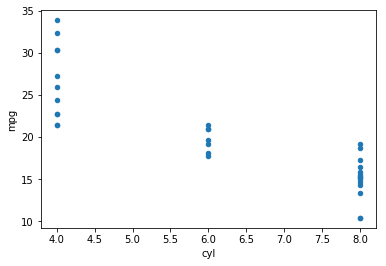

In [38]:
#df.shape[0]
df.columns
# first, plot the observed data
#df.columns
df.plot(y='mpg', x='cyl', kind='scatter' )



## What can we say about the waiting times?

In [39]:
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf

# create a fitted model in one line
three_var_mdl = smf.ols(formula='mpg ~ wt + disp + hp', data=df).fit()

# print the coefficients

In [40]:
three_var_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     44.57
Date:                Fri, 22 Sep 2017   Prob (F-statistic):           8.65e-11
Time:                        05:33:56   Log-Likelihood:                -74.321
No. Observations:                  32   AIC:                             156.6
Df Residuals:                      28   BIC:                             162.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     37.1055      2.111     17.579      0.000        32.782    41.429
wt            -3.8009      1.066     -3.565      0.001        -5.985    -1.617
disp          -0.0009      0.010     -0.091      0.929        -0.022     0.020
hp            -0.0312      0.011     -2.724      0.011        -0.055    -0.008
==============================================================================
Omnibus:                        5.269   Durbin-Watson:                   1.367
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                4.038
Skew:                           0.856   Prob(JB):                        0.133
Kurtosis:                       3.310   Cond. No.                     1.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interpreting Model Coefficients

We can write the model as:

### mpg = 34.96 - 3.35  * weight - 0.0177 * disp

How do we interpret the waiting coefficient ($\beta_1$)?

An additional ton in car weight reduces the mpg by 3.4 miles


### Using the Model for Prediction

Let's say that there was an eruption that lasted **3 minutes **

What would we predict for the waiting time?


In [23]:
wait_time = 33.4 + 10.72 * 1.2
print("{} minutes".format(wait_time))

46.263999999999996 minutes


In [ ]:
# What does the R^2 Look like?

print(linear_mdl_wating.rsquared)
print(linear_mdl_wating.rsquared_adj)

In [18]:
df['wt']

0     2.620
1     2.875
2     2.320
3     3.215
4     3.440
5     3.460
6     3.570
7     3.190
8     3.150
9     3.440
10    3.440
11    4.070
12    3.730
13    3.780
14    5.250
15    5.424
16    5.345
17    2.200
18    1.615
19    1.835
20    2.465
21    3.520
22    3.435
23    3.840
24    3.845
25    1.935
26    2.140
27    1.513
28    3.170
29    2.770
30    3.570
31    2.780
Name: wt, dtype: float64

### Use the Model to make predictions

Statsmodel can be used to make predictions.

**Note** It expects the inputs to come as a data frame.



In [19]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_newdata = pd.DataFrame({'wt': [2.5,3,3.5], 'disp':[160,200,240]})
X_newdata.head()

,disp,wt
0,160,2.5
1,200,3.0
2,240,3.5


In [20]:
mpg_mdl.predict(X_newdata)

array([ 23.74753162,  21.36312918,  18.97872674])

### Plotting the Least Squares Line

Let's make predictions for the smallest and largest observed values of x, and then use the predicted values to plot the least squares line:

In [22]:
# make predictions for those x values and store them
preds = mpg_mdl.predict(X_newdata)
preds

array([ 23.74753162,  21.36312918,  18.97872674])